# Notebook to analyze UV-vis data

In [2]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [3]:
# Import data
data = pd.read_excel('./UV_Vis/Paninis_Feb_2019.xlsx', sheet_name='Sheet1')
columns = data.columns
data["Energy"] = (4.135667516E-15)*(299792458)/(data[columns[0]]*1E-9)
columns = data.columns
data.head()

,Wavelength nm.,Paninis_Feb_2019_161951,Energy
0,300.0,0.166,4.132806
1,300.5,0.163,4.125930
2,301.0,0.169,4.119076
3,301.5,0.169,4.112245
4,302.0,0.162,4.105437


In [4]:
columns

Index(['Wavelength nm.', 'Paninis_Feb_2019_161951', 'Energy'], dtype='object')

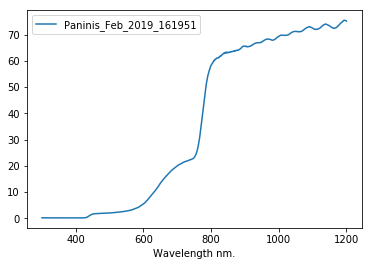

In [7]:
data.plot(x=columns[0], y=columns[1])
#data.plot(x=columns[0], y=[columns[1], columns[2], 
                           #columns[3], columns[4]])

In [12]:
for column in columns[1:2]:
    name = 'A_' + column
    data[name] = 100 - data[column]
columns = data.columns

In [13]:
len(columns)

4

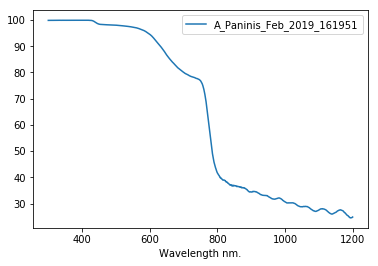

In [15]:
data.plot(x=columns[0], y=columns[3])
#data.plot(x=columns[0], y=[columns[10], columns[11], 
                           #columns[12], columns[13]])

In [16]:
for column in columns[1:2]:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000050)*np.log(data[column]/100)
    name = column + '_Tauc_direct'
    data[name] = np.power(data['Energy'], 2) * np.power(alpha, 2)
    
columns = data.columns

In [17]:
len(columns)

5

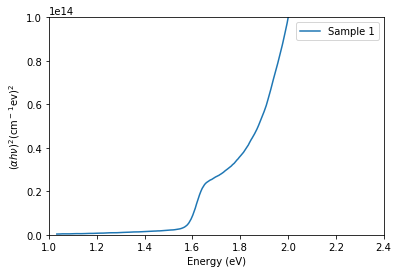

In [20]:
data.plot(x='Energy', y=columns[4])
#data.plot(x='Energy', y=[columns[14], columns[15],
 #                       columns[16], columns[17]])
plt.xlim(1, 2.4)
plt.ylim(0, 0.1E15)
plt.xlabel('Energy (eV)')
plt.ylabel(r'($\alpha h \nu$)$^2$(cm$^-$$^1$ev)$^2$')
plt.legend(['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4'])
plt.savefig('tauc_plots_paninis.png', dpi=300)

In [17]:
for column in [columns[8], columns[4], columns[9]]:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000003)*np.log(data[column]/100)
    name = column[0:8] + '_Tauc_indirect'
    data[name] = np.power(data['Energy'], 0.5) * np.power(alpha, 0.5)
    
columns = data.columns

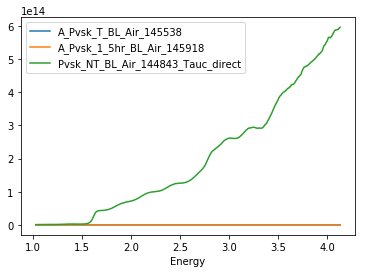

In [18]:
data.plot(x='Energy', y=[columns[17], columns[18], columns[19]])

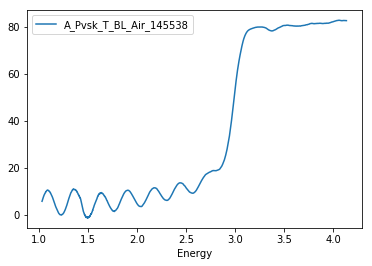

In [19]:
data.plot(x='Energy', y=[columns[17]])